# Titan Stock 

In [1]:
#Importing necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


# importing datasets - collected titan data for 5 years from feb 2018-feb 2023

In [2]:
db1=pd.read_csv(r"C:\Users\vasan\Downloads\Quote-Equity-TITAN-EQ-04-02-2021-to-04-02-2023.csv",parse_dates=['Date '],index_col=['Date '])
db1.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-02-03,EQ,"2,320.10","2,470.00","2,320.10","2,308.10","2,458.30","2,463.10","2,425.35","2,791.00","1,825.05",3693638,"8,958,363,285.70",205942
2023-02-02,EQ,"2,341.05","2,385.00","2,269.60","2,345.90","2,325.00","2,308.10","2,336.44","2,791.00","1,825.05",1788381,"4,178,441,160.95",114317
2023-02-01,EQ,"2,408.55","2,409.80","2,300.05","2,377.15","2,345.00","2,345.90","2,363.36","2,791.00","1,825.05",1521514,"3,595,890,169.10",103902
2023-01-31,EQ,"2,347.00","2,386.45","2,335.65","2,335.55","2,383.00","2,377.15","2,367.90","2,791.00","1,825.05",1252600,"2,966,030,261.25",90793
2023-01-30,EQ,"2,332.00","2,342.85","2,287.05","2,331.25","2,340.00","2,335.55","2,315.79","2,791.00","1,825.05",1401847,"3,246,381,011.10",120736


In [3]:
db2=pd.read_csv(r"C:\Users\vasan\Downloads\Quote-Equity-TITAN-EQ-04-02-2019-to-04-02-2021.csv",parse_dates=['Date '],index_col=['Date '])
db2.head()


,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2021-02-04,EQ,"1,530.00","1,540.00","1,488.10","1,525.15","1,511.95","1,513.60","1,507.87","1,621.35",720.9,2728965,"4,114,924,472.35",79930
2021-02-03,EQ,"1,492.00","1,529.00","1,492.00","1,485.45","1,520.10","1,525.15","1,518.24","1,621.35",720.9,1853072,"2,813,415,047.10",66399
2021-02-02,EQ,"1,515.00","1,536.00","1,482.00","1,501.55","1,488.00","1,485.45","1,504.37","1,621.35",720.9,1974202,"2,969,930,201.00",65640
2021-02-01,EQ,"1,437.80","1,508.55","1,423.65","1,420.30","1,505.75","1,501.55","1,469.39","1,621.35",720.9,2215933,"3,256,060,141.60",74312
2021-01-29,EQ,"1,456.00","1,469.25","1,415.25","1,450.10","1,422.00","1,420.30","1,439.44","1,621.35",720.9,2435997,"3,506,475,243.70",62294


In [4]:
db2.columns

Index(['series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ',
       'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades '],
      dtype='object')

In [5]:
db3=pd.read_csv(r"C:\Users\vasan\Downloads\Quote-Equity-TITAN-EQ-04-02-2018-to-04-02-2019.csv",parse_dates=['Date '],index_col=['Date '])
db3.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2019-02-04,EQ,"1,025.00","1,050.00","1,009.05",991.55,"1,024.50","1,025.75","1,032.34","1,050.00",732.3,9556052,"9,865,132,637.60",230113
2019-02-01,EQ,"1,003.00","1,005.00",985.10,995.80,991.80,991.55,991.67,"1,005.00",732.3,3424938,"3,396,415,408.95",88182
2019-01-31,EQ,968.20,"1,000.00",966.50,968.90,"1,000.00",995.80,986.14,"1,000.00",732.3,2306391,"2,274,435,354.85",69982
2019-01-30,EQ,966.10,974.95,960.05,966.10,964.55,968.90,967.76,999.70,732.3,1468812,"1,421,453,859.20",50380
2019-01-29,EQ,955.20,970.00,945.00,958.65,966.30,966.10,962.53,999.70,732.3,1411027,"1,358,155,357.10",53060


In [6]:
db1.shape,db2.shape,db3.shape #checking the shape of the dataset 

((497, 13), (471, 13), (247, 13))

In [7]:
db=pd.concat([db1,db2,db3]) #joning three tables 
db

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-02-03,EQ,"2,320.10","2,470.00","2,320.10","2,308.10","2,458.30","2,463.10","2,425.35","2,791.00","1,825.05",3693638,"8,958,363,285.70",205942
2023-02-02,EQ,"2,341.05","2,385.00","2,269.60","2,345.90","2,325.00","2,308.10","2,336.44","2,791.00","1,825.05",1788381,"4,178,441,160.95",114317
2023-02-01,EQ,"2,408.55","2,409.80","2,300.05","2,377.15","2,345.00","2,345.90","2,363.36","2,791.00","1,825.05",1521514,"3,595,890,169.10",103902
2023-01-31,EQ,"2,347.00","2,386.45","2,335.65","2,335.55","2,383.00","2,377.15","2,367.90","2,791.00","1,825.05",1252600,"2,966,030,261.25",90793
2023-01-30,EQ,"2,332.00","2,342.85","2,287.05","2,331.25","2,340.00","2,335.55","2,315.79","2,791.00","1,825.05",1401847,"3,246,381,011.10",120736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09,EQ,790.10,804.00,783.05,800.75,796.05,796.80,796.06,938.50,383.15,1564899,"1,245,747,232.90",43947
2018-02-08,EQ,785.10,808.90,780.80,783.65,800.80,800.75,795.94,938.50,383.15,2219546,"1,766,626,655.70",70462
2018-02-07,EQ,785.00,801.00,780.00,782.65,784.00,783.65,791.39,938.50,383.15,2686877,"2,126,363,479.40",79600


In [8]:
db.shape #checking shape after joining 


(1215, 13)

In [9]:
db.isnull().sum() ##checking for null values  after joining

series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [10]:
db.dtypes # checking datatypes of dataset

series           object
OPEN             object
HIGH             object
LOW              object
PREV. CLOSE      object
ltp              object
close            object
vwap             object
52W H            object
52W L            object
VOLUME            int64
VALUE            object
No of trades      int64
dtype: object

In [11]:
db.info() #observing the information of dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 2023-02-03 to 2018-02-05
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   series         1215 non-null   object
 1   OPEN           1215 non-null   object
 2   HIGH           1215 non-null   object
 3   LOW            1215 non-null   object
 4   PREV. CLOSE    1215 non-null   object
 5   ltp            1215 non-null   object
 6   close          1215 non-null   object
 7   vwap           1215 non-null   object
 8   52W H          1215 non-null   object
 9   52W L          1215 non-null   object
 10  VOLUME         1215 non-null   int64 
 11  VALUE          1215 non-null   object
 12  No of trades   1215 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 132.9+ KB


In [12]:
# renaming columns 
cols=['Series','Open','High','Low','Previous_close','last_traded_price','Close','Vwap','52wh','52wl','Volume','Value','Nooftraders']

In [13]:
db.columns=cols

In [14]:
#checking for any null values 
db.isnull().sum()

Series               0
Open                 0
High                 0
Low                  0
Previous_close       0
last_traded_price    0
Close                0
Vwap                 0
52wh                 0
52wl                 0
Volume               0
Value                0
Nooftraders          0
dtype: int64

In [15]:
# replacing object datatypes as float 
db['Open']=db['Open'].str.replace(',','').astype(float)
db['High']=db['High'].str.replace(',','').astype(float)
db['Low']=db['Low'].str.replace(',','').astype(float)
db['last_traded_price']=db['last_traded_price'].str.replace(',','').astype(float)
db['Close']=db['Close'].str.replace(',','').astype(float)
db['Vwap']=db['Vwap'].str.replace(',','').astype(float)
db['Value']=db['Value'].str.replace(',','').astype(float)


<AxesSubplot:xlabel='Date '>

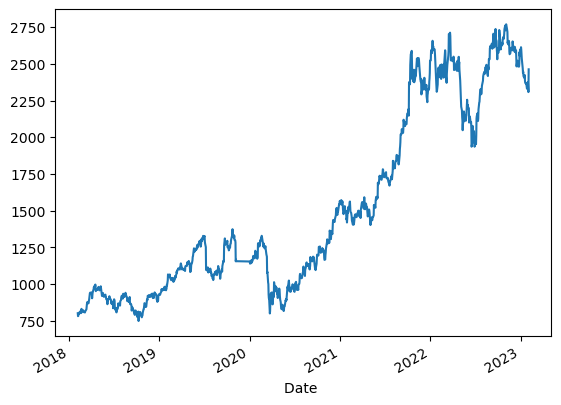

In [16]:
db.Close.plot()

In [17]:
db.describe()

,Open,High,Low,last_traded_price,Close,Vwap,Volume,Value,Nooftraders
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1.215000e+03,1215.000000
mean,1528.664033,1547.417695,1507.101193,1527.635267,1527.273745,1527.252181,2.318868e+06,3.092927e+09,82822.887243
std,627.645533,633.137310,620.276337,626.320457,626.142945,626.386902,1.794731e+06,2.090076e+09,46078.996177
min,746.000000,787.000000,720.900000,749.000000,749.500000,770.100000,1.815060e+05,2.817199e+08,10139.000000
25%,985.000000,994.875000,966.025000,980.500000,979.725000,979.790000,1.227330e+06,1.912385e+09,54639.500000
50%,1275.200000,1292.550000,1257.650000,1275.000000,1275.000000,1272.700000,1.859258e+06,2.590376e+09,71139.000000
75%,2137.450000,2165.500000,2110.750000,2141.350000,2139.975000,2136.545000,2.829072e+06,3.577893e+09,96742.000000
max,2774.900000,2791.000000,2746.600000,2770.000000,2769.700000,2761.110000,2.214359e+07,2.451345e+10,536406.000000


In [18]:
db.columns

Index(['Series', 'Open', 'High', 'Low', 'Previous_close', 'last_traded_price',
       'Close', 'Vwap', '52wh', '52wl', 'Volume', 'Value', 'Nooftraders'],
      dtype='object')

In [19]:
#dropping columns from the dataset
db.drop(['Series','Open','High','Low','Previous_close','last_traded_price','Vwap','Nooftraders','52wh','52wl','Previous_close','Value','Volume'],axis=1,inplace=True)

In [20]:
#creating a function for simple moving average 
def Sma(db,period=50,column='Close'):
    return db[column].rolling(window=period).mean()

In [21]:
#creating a function for simple moving average 
def Ema(db,period=30,column='Close'):
    return db[column].ewm(span=period).mean()

In [22]:
db['Sma']=Sma(db)
db['Ema']=Ema(db)

In [23]:
db.dropna(inplace=True)

In [24]:
db['Short_long']=np.where(db.Ema>db.Sma,1,0)

In [25]:
db['Signal']=db['Short_long'].diff()

In [26]:
db.dropna(inplace=True)

In [27]:
#splitting the data 
X=db.drop(['Signal'],axis=1)
y=db['Signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [28]:
X_train.shape

(932, 4)

In [29]:
X_train.head()

,Close,Sma,Ema,Short_long
Date,,,,
2022-11-24,2610.20,2504.468,2569.534134,1
2022-11-23,2601.75,2510.341,2571.679471,1
2022-11-22,2606.20,2515.547,2573.973517,1
2022-11-21,2573.35,2519.471,2573.932162,1
2022-11-18,2565.80,2524.076,2573.393762,1


In [30]:
#training a logistic regression model() 
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [31]:
# predict using the X_test data
y_pred=clf.predict(X_test)

In [32]:
# checking the score of model for test data
clf.score(X_test,y_test)

0.9828326180257511

In [33]:
clf.score(X_train,y_train)

0.9796137339055794

In [34]:
#creating folds for cross validation
folds=StratifiedKFold(n_splits=5)

In [35]:
model=cross_val_score(SVC(),X_train,y_train,cv=5)
model.mean()

0.9796158932781325

### Visualizations demonstrations using crossover techinque for buy and sell triggers 

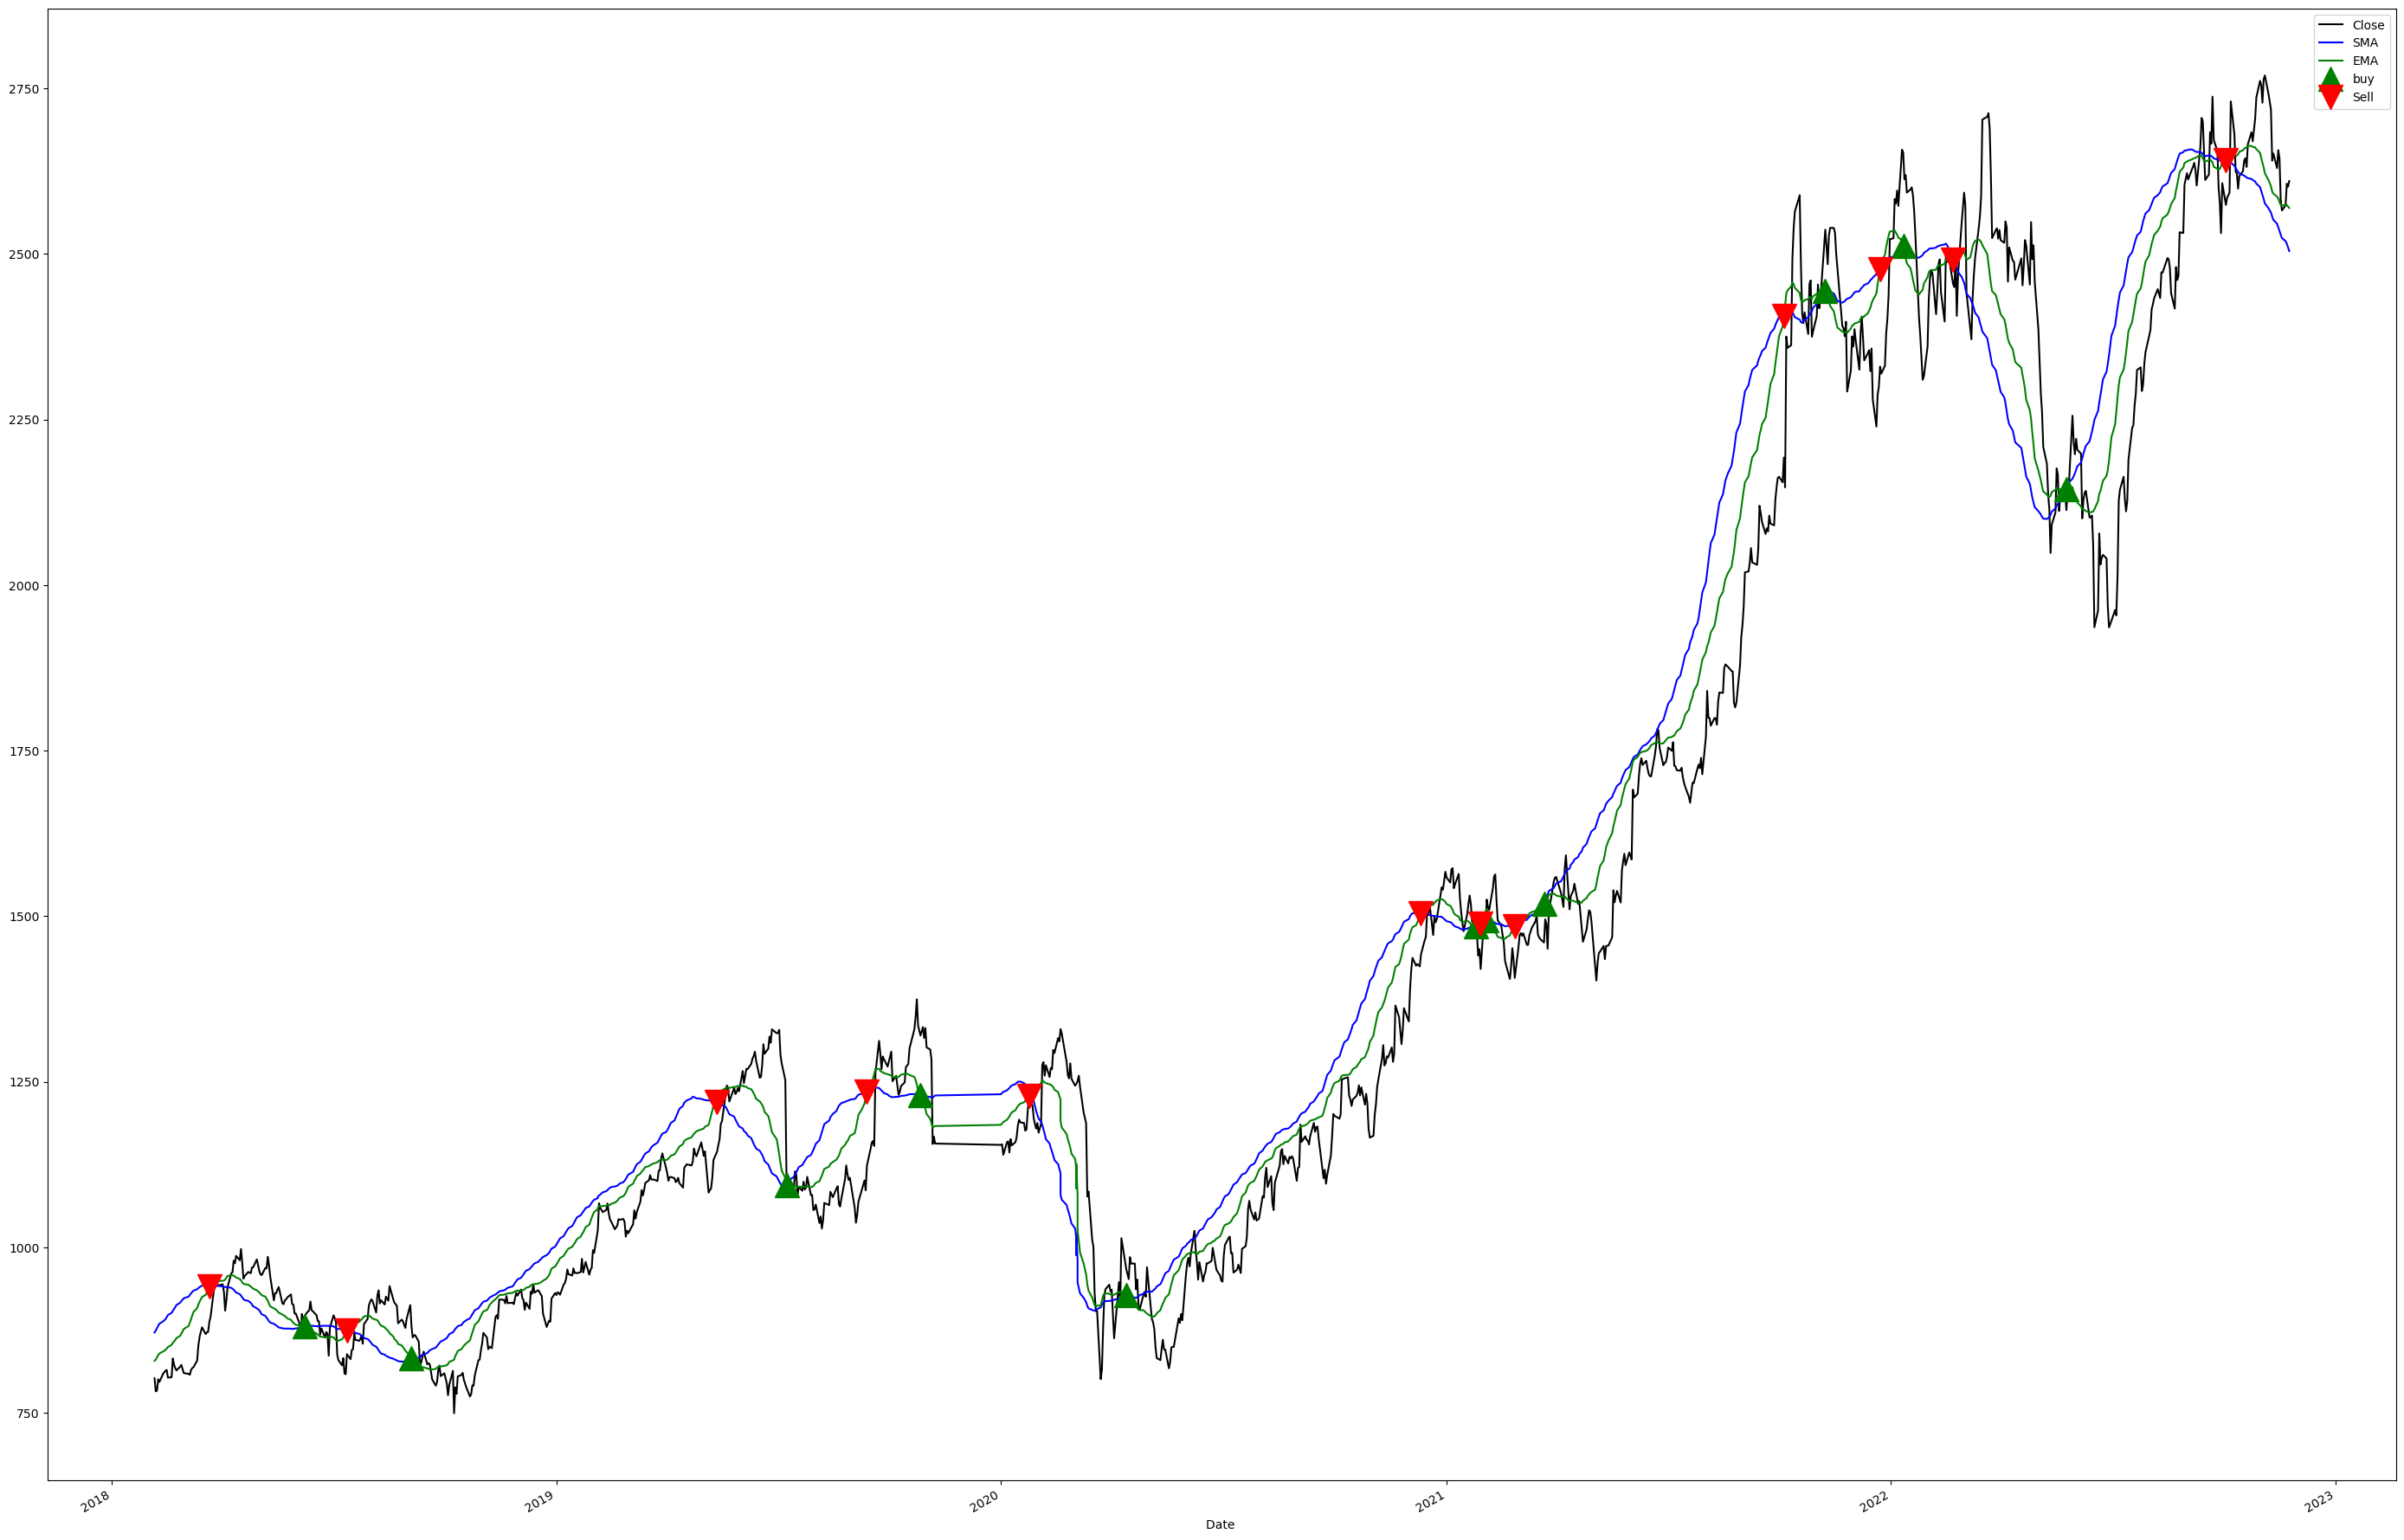

In [40]:
plt.figure(figsize=(35,25))
db['Close'].plot(label='Close',color='k')
db['Sma'].plot(label='SMA',color='b')
db['Ema'].plot(label='EMA',color='g')
plt.plot(db[db.Signal==1].index,
        db['Ema'][db['Signal']==1],
         '^',markersize=20,color='g',label='buy')
plt.plot(db[db.Signal==-1].index,
        db['Ema'][db['Signal']==-1],
         'v',markersize=20,color='r',label='Sell')
         
plt.legend()
plt.show()

# Evalution metrics 

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9828326180257511

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[  0,   2,   0],
       [  0, 229,   0],
       [  0,   2,   0]], dtype=int64)

<AxesSubplot:>

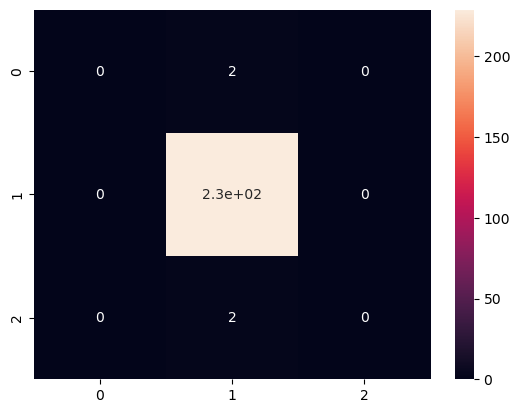

In [43]:
sns.heatmap(cm,annot=True)

#### Created macd indicators also but it seems more volatile 

#creating a function for moving average convergence & divergence 
def Macd(db,long_period=26,short_period=12,signal_period=10,column='Close'):
    Shortema=Ema(db,short_period,column='Close')
    Longema=Ema(db,long_period,column='Close')
    db['Macd']=Shortema-Longema
    db['Signal_line']=Ema(db,signal_period,column='Macd')
    return db

plt.figure(figsize=(35,25))

db['Macd'].plot(label='Macd',color='k')

db['Signal_line'].plot(label='Signal_line',color='b')

plt.legend()




##### Limitations of the models
- model doesnot performs well in consolidation period. during consolidation they often gives fake signals but works in long term 
-the model is a base model i just used close price only. There are so many factors acts as major thinks in stocks it may be fundamentally or techinally impact a stock 

Thanks for the opportunity . Learned a lot during this assignment hope to work with you guys .